In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # Disable the warning
from scipy.stats import norm
%matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
hits = pd.read_hdf(f"../config/ATPC_0nubb.h5", 'MC/hits')

display(hits)

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,1908.942505,1202.253174,854.039551,0.002031,0.010386,GAS,2,0
1,0,1908.457764,1202.905640,854.360840,0.005833,0.050519,GAS,2,1
2,0,1908.426880,1202.261475,854.310486,0.008797,0.024242,GAS,2,2
3,0,1908.026123,1201.973999,854.076843,0.011376,0.029485,GAS,2,3
4,0,1907.671753,1201.743774,853.996216,0.013506,0.018788,GAS,2,4
...,...,...,...,...,...,...,...,...,...
13336454,99999,1832.016113,392.339081,-1429.004883,0.046412,0.003696,GAS,1,20
13336455,99999,1832.019653,392.335938,-1429.000366,0.046512,0.005250,GAS,1,21
13336456,99999,1832.019043,392.337738,-1429.002441,0.046569,0.002231,GAS,1,22
13336457,99999,1832.019287,392.336334,-1429.003296,0.046608,0.003556,GAS,1,23


In [4]:
# Mean energy per e-. This splits up each G4 into E_hit/E_mean electrons
E_mean = 24.8e-6 # [eV]

# Function to smear the number of electrons in each hit by the fano factor
def smear_energy(N, resolution):
    if N < 10:
        return np.random.poisson(N)  # Poisson for small N
    else:
        # sigma = np.sqrt(N * 0.15) # 0.15 Fano factor
        if (resolution == 1):
            sigma = np.sqrt(N * 1.8) # 1% ER
        elif (resolution == 0.5):
            sigma = np.sqrt(N * 0.45) # 0.5% ER
        else:
            print("Error resoltion not defined, using default 1%")
            sigma = np.sqrt(N * 1.8) # 1% ER
        
        # new_n = int(round(np.random.normal(N, sigma)))
        return int(round(np.random.normal(N, sigma)))
        
        if (new_n < 0):
            return 1
        else:
            return new_n  # Apply Gauss+rounding

In [5]:
def FilterEventE(df, Emin, Emax, E_mean):

    event_energies = df.groupby("event_id").n.sum()*E_mean*1000

    passed_events = event_energies[ (event_energies >= Emin) & ((event_energies <= Emax))].index

    dfs_filtered = df[df["event_id"].isin(passed_events)]

    return dfs_filtered

In [6]:
e_sum = []

dfs = []
dfs2 = []

for index, e in enumerate(hits.event_id.unique()):
    print("On Event:", e )

    # Select the event
    event = hits[hits.event_id == e]

    # Calc number of electrons in a hit
    event["n"] = round(event["energy"]/E_mean)
    event2 = event.copy()
    
    # Smear the energy by Fano amount
    event["n"]  = event["n"].apply(lambda x: smear_energy(x, resolution=1))
    event2["n"] = event2["n"].apply(lambda x: smear_energy(x, resolution=0.5))
    
    dfs.append(event)
    dfs2.append(event2)


dfs = pd.concat(dfs)
dfs2 = pd.concat(dfs2)
display(dfs)




# dfs  = FilterEventE(dfs, 2433.3804, 2482.5396, E_mean)
# dfs2 = FilterEventE(dfs2, 2445.6702, 2470.2498, E_mean)

event_energies = dfs.groupby("event_id").n.sum()*E_mean*1000
event_energies = dfs2.groupby("event_id").n.sum()*E_mean*1000
print(event_energies)



On Event: 0
On Event: 1
On Event: 2
On Event: 3
On Event: 4
On Event: 5
On Event: 6
On Event: 7
On Event: 8
On Event: 9
On Event: 10
On Event: 11
On Event: 12
On Event: 13
On Event: 14
On Event: 15
On Event: 16
On Event: 17
On Event: 18
On Event: 19
On Event: 20
On Event: 21
On Event: 22
On Event: 23
On Event: 24
On Event: 25
On Event: 26
On Event: 27
On Event: 28
On Event: 29
On Event: 30
On Event: 31
On Event: 32
On Event: 33
On Event: 34
On Event: 35
On Event: 36
On Event: 37
On Event: 38
On Event: 39
On Event: 40
On Event: 41
On Event: 42
On Event: 43
On Event: 44
On Event: 45
On Event: 46
On Event: 47
On Event: 48
On Event: 49
On Event: 50
On Event: 51
On Event: 52
On Event: 53
On Event: 54
On Event: 55
On Event: 56
On Event: 57
On Event: 58
On Event: 59
On Event: 60
On Event: 61
On Event: 62
On Event: 63
On Event: 64
On Event: 65
On Event: 66
On Event: 67
On Event: 68
On Event: 69
On Event: 70
On Event: 71
On Event: 72
On Event: 73
On Event: 74
On Event: 75
On Event: 76
On Event:

KeyboardInterrupt: 

FWMH: 11.630741597283533
Eres FWMH: 0.4732167045290437


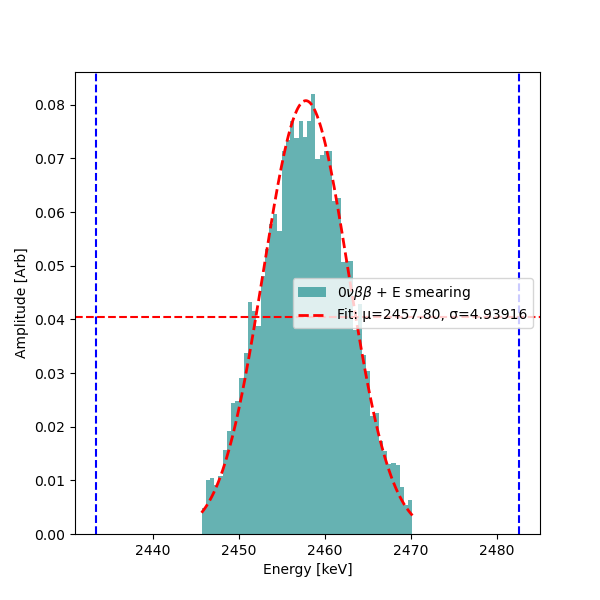

In [ ]:
fig = plt.figure(figsize=(6,6));

plt.subplot(111);
# Plot histogram
counts, bins, _ = plt.hist(event_energies, bins=50, density=True, alpha=0.6, color='Teal', label=r'$0\nu\beta\beta$ + E smearing')
mu, sigma = norm.fit(event_energies)


# Plot the fitted Gaussian curve
x = np.linspace(bins[0], bins[-1], 200)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r--', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={sigma:.5f}')
plt.xlabel('Energy [keV]')
plt.ylabel("Amplitude [Arb]")
plt.legend()

print("FWMH:", 2.3548*sigma)
print("Eres FWMH:", 100*2.3548*sigma/mu)

plt.axhline(y=max(pdf)/2.0, color='r', linestyle='--')

plt.axvline(x=2.43342*1000, color='b', linestyle='--')
plt.axvline(x=2.48258*1000, color='b', linestyle='--')
